Name: Yuan Chen
ID: 9082757429

In [207]:
import pandas as pd
import math

In [362]:
#Q1
def read_file(FileName):
    D = pd.read_csv(FileName, sep=" ", header=None)
    return D
    
def entropy(D):
    n=D.shape[0]
    zeros = D[D[2]==0][2].count()
    ones = D[D[2]==1][2].count()
    if zeros==0 or ones == 0:
        return 0
    P0 = zeros/n
    P1 = ones/n
    entropy = -P0*math.log2(P0)-P1*math.log2(P1)
    return entropy

def cal_info_gain(left, right, D):
    n = D.shape[0]
    P1 = left.shape[0]/n
    P2 = right.shape[0]/n
    info_gain = (entropy(D)-P1*entropy(left)-P2*entropy(right))/math.log2(n)
    return info_gain

def best_split(D):
    #check if D is done
    S = get_split_set(D)
    max_info_gain = 0
    for s in S:
        #split D into left and right
        left = D[D[s[0]]<=s[1]]
        right = D[D[s[0]]>s[1]]
        #calculate and find the biggest gain
        curr_info_gain = cal_info_gain(left, right, D)
        if curr_info_gain > max_info_gain:
            max_info_gain=curr_info_gain
            m_s, m_gain, m_left, m_right = s, max_info_gain, left, right
    if max_info_gain == 0:
        return {'split': None, 'gain_ratio': max_info_gain, 'left': D, 'right': None, 'label': None}
    return {'split': m_s, 'gain_ratio': m_gain, 'left': m_left, 'right': m_right, 'label': None}

def split(node):
    if cal_info_gain(node['left'], node['right'], D) == 0:
        add_leaf(node)  
    if entropy(node['left'])==0:
        node['left'] = {'split': None, 'gain_ratio': None, 'left': node['left'], 'right': None, 'label': None}
        add_leaf(node['left'])
    else:
        node['left'] = best_split(node['left'])
        split(node['left'])
        
    if entropy(node['right'])==0:
        node['right'] = {'split': None, 'gain_ratio': None, 'left': node['right'], 'right': None, 'label': None}
        add_leaf(node['right'])
    else:
        node['right'] = best_split(node['right'])
        split(node['right'])
        
def add_leaf(node):
    D = pd.concat([node['left'], node['right']])
    zeros = D[D[2]==0][2].count()
    ones = D[D[2]==1][2].count()
    if ones>=zeros:
        node['label']=1
    else:
        node['label']=0
    
def train(D):
    root = best_split(D) 
    if root['split'] == None:
        add_leaf(root)
    else:
        split(root)
    return root

def get_split_set(D):
#     S=set()
    S=list()
    for j in range(D.shape[1]-1):
        DS=D.sort_values(by=j)
        for i in range(DS.shape[0]-1):
            avg = (DS[j].iloc[i]+DS[j].iloc[i+1])/2
#             S.add((j, avg))
            S.append((j, avg))
    return S
    
def test(node, X, y):
    ct=0
    y_v = y.values
    for i in range(X.shape[0]):
        curr_node = node
        if curr_node['label'] != None:
            prediction = curr_node['label']
        else:
            while curr_node['label'] == None:
                j = curr_node['split'][0]
                val = curr_node['split'][1]
                if val - X.iloc[i][j] > -0.000001:
                    curr_node = curr_node['left']
                else:
                    curr_node = curr_node['right']
            prediction = curr_node['label']
        if prediction == y_v[i]:
            ct += 1
    err = 1-ct/X.shape[0]
    return err

def count_nodes(root):
    ct = 0
    s = []
    curr_node = root
    s.append(curr_node)
    while len(s) > 0:
        curr_node = s.pop()
        ct+=1
        if curr_node['label'] == None:
            s.append(curr_node['left'])
            s.append(curr_node['right'])
    return ct

def vis_tree(D, tree):
    xnew = np.linspace(0.0, 2.0, num = 100)
    colors = {0: 'orange', 1:'blue'}
    plt.scatter(D.iloc[:, 0], D.iloc[:, 1], c=D.iloc[:, 2].map(colors))
    
    s = []
    boundaries=[]
    curr_node = tree
    s.append(curr_node)
    while len(s) > 0:
        curr_node = s.pop()
        if curr_node['label'] == None:
            s.append(curr_node['left'])
            s.append(curr_node['right'])
            boundaries.append(curr_node['split'])    
    for boundary in boundaries:
        if boundary[0] == 0:
            plt.axvline(x=boundary[1], color='r', linestyle='-')
        if boundary[0] == 1:
            plt.axvline(y=boundary[1], color='r', linestyle='-')
    
    plt.xlabel("x_1")
    plt.ylabel("x_2")
    plt.show()

Q2.1
Because no matter how to split the node, the info gain will be zero

Q2.2
For example, a data set of (x, y) pair [[1, 0], [0, 0], [0, 1], [1, 1]] can not be split because it will have 0 infomation gain at the first split, once we mannually split [1, 1] from the rest, it can continue to split.

Text(0, 0.5, 'y')

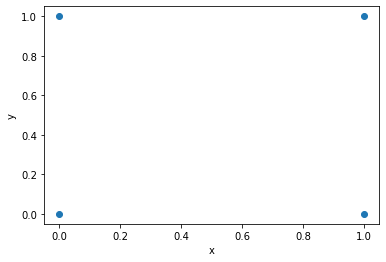

In [390]:
x = [1, 0, 0, 1]
y = [0, 0, 1, 1]
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')

In [109]:
# Q2.3
D = read_file("Druns.txt")
S = get_split_set(D)
for s in S:
    left = D[D[s[0]]<=s[1]]
    right = D[D[s[0]]>s[1]]
    info_gain = cal_info_gain(left, right, D)
    print('candidate cut: ', s, 'infomation gain ratio:', info_gain)

candidate cut:  (1, 2.5) infomation gain ratio: 0.004715562446110173
candidate cut:  (0, 0.0) infomation gain ratio: 0.0127701301072872
candidate cut:  (1, 5.5) infomation gain ratio: 0.05769358819363126
candidate cut:  (1, 1.5) infomation gain ratio: 0.00031281610171092575
candidate cut:  (1, 4.5) infomation gain ratio: 0.030408328207245747
candidate cut:  (1, 0.5) infomation gain ratio: 0.00141241817456925
candidate cut:  (1, 7.5) infomation gain ratio: 0.05464847679732022
candidate cut:  (1, -0.5) infomation gain ratio: 0.011063818113962103
candidate cut:  (1, 6.5) infomation gain ratio: 0.01106381811396212
candidate cut:  (1, 3.5) infomation gain ratio: 0.014294854831925743
candidate cut:  (0, 0.05) infomation gain ratio: 0.0127701301072872
candidate cut:  (1, -1.5) infomation gain ratio: 0.0127701301072872


Q2.4
                                                    [x_1<10]
                                           (yes) /            \ (no)
                                              [x_2>1]    D:[3+, 0-]
                                      (yes)/      \(no)
                                   D:[1+, 0-]  D: [0+, 1-]
 
 if: (x_1>=10) or ((x_1<10) and (x_2>1)), y = 1
 else: y = 0

In [374]:
#Q2.5
D1=read_file("D1.txt")
D2=read_file("D2.txt")
tree1=train(D1)
tree2=train(D2)
print("Tree 1")
print(tree1)
print("Tree 2")
print(tree2)

Tree 1
{'split': (1, 0.200777), 'gain_ratio': 0.06713127797540343, 'left': {'split': None, 'gain_ratio': None, 'left':             0         1  2
0    0.264185  0.178456  0
13   0.218459  0.094800  0
18   0.428589  0.098529  0
20   0.846905  0.132193  0
23   0.318465  0.037164  0
..        ...       ... ..
974  0.755479  0.062776  0
979  0.552803  0.015756  0
986  0.195872  0.122877  0
990  0.924543  0.076672  0
991  0.197509  0.086896  0

[175 rows x 3 columns], 'right': None, 'label': 0}, 'right': {'split': None, 'gain_ratio': None, 'left':             0         1  2
1    0.409499  0.213456  1
2    0.926224  0.540329  1
3    0.573685  0.282145  1
4    0.953159  0.608121  1
5    0.422326  0.844277  1
..        ...       ... ..
995  0.211320  0.737143  1
996  0.625005  0.233578  1
997  0.285166  0.956678  1
998  0.751571  0.514041  1
999  0.142654  0.226182  1

[825 rows x 3 columns], 'right': None, 'label': 1}, 'label': None}
Tree 2
{'split': (0, 0.53287), 'gain_ratio': 0.022434053318

Tree 1: The data can be split by the second feature with value 0.20777. If x_2<0.20777, all labels are zero. And if x_2>0.20777, all labels are one.
Tree 2: It's very difficult to describe them in a reasonable time, since there are many nodes and data.

In [3]:
#Q2.6
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from dtreeviz.trees import dtreeviz

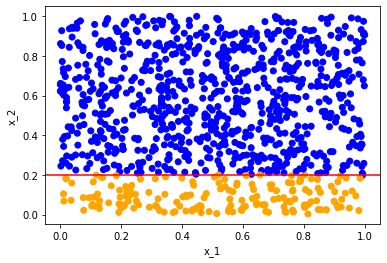

In [375]:
#visualization using my own code, I don't have much experience in data visualization, will add something using external library later
vis_tree(D1, tree1)

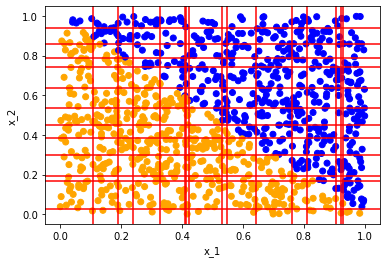

In [376]:
vis_tree(D2, tree2)

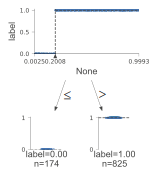

In [111]:
#visualization using sklearn and dtreeviz
D1 = pd.read_csv("D1.txt", sep=" ")
X = D1.iloc[:, :-1]
y = D1.iloc[:,[-1]]
X = X.to_numpy()
y = y.to_numpy()
# print(X, y)
regr = DecisionTreeRegressor(max_depth=5, random_state=1234)
model = regr.fit(X, y)
viz = dtreeviz(regr, X, y, target_name='label',)
viz

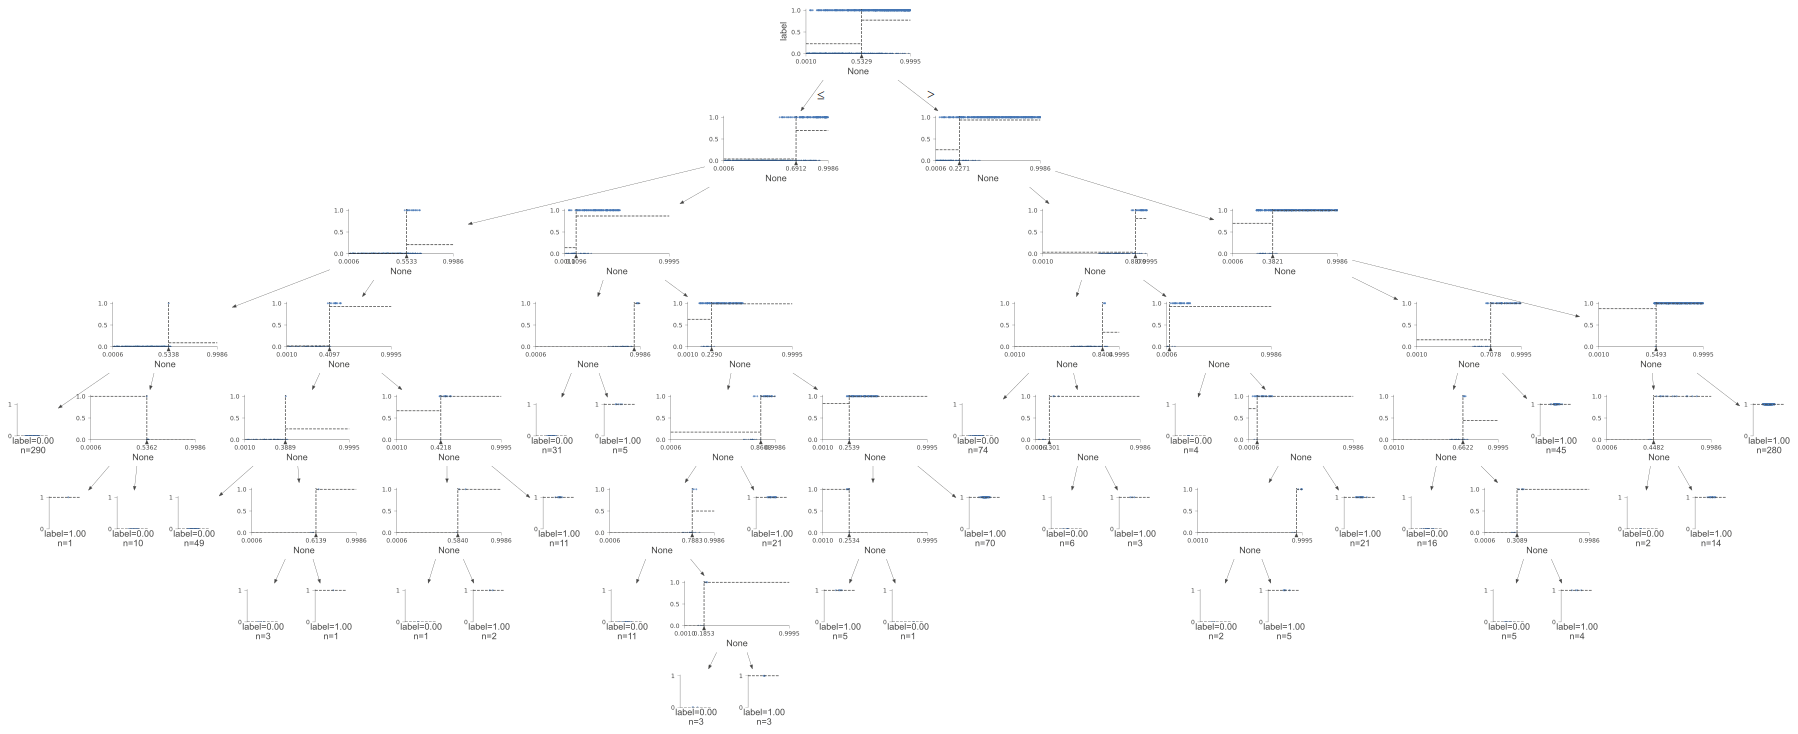

In [113]:
D2 = pd.read_csv("D2.txt", sep=" ")
X = D2.iloc[:, :-1]
y = D2.iloc[:,[-1]]
X = X.to_numpy()
y = y.to_numpy()
# print(X, y)
regr = DecisionTreeRegressor(max_depth=10, random_state=1234)
model = regr.fit(X, y)
viz = dtreeviz(regr, X, y, target_name='label',)
viz

The parameters in D1 is very discreated, thus easy to find the hypothesis and use the simplest one to present the data. While in D2, the data is tilted so it's hard to use splitting to split data, we have to use information-theoretic heuristic to find the split greedily and therefore genarate much bigger tree.

In [381]:
#Q2.7
D = read_file("Dbig.txt")
D_train = D.sample(n=8192, random_state=1)
D_test = D.drop(D_train.index)
D_32 = D_train.iloc[:32, :]
D_128 = D_train.iloc[:128, :]
D_512 = D_train.iloc[:512, :]
D_2048 = D_train.iloc[0:2048, :]
D_8192 = D_train.iloc[0:8192, :]

In [382]:
tree_32 = train(D_32)
tree_128 = train(D_128)
tree_512 = train(D_512)
tree_2048 = train(D_2048)
tree_8192 = train(D_8192)

In [383]:
#Q2.7.1
X = D_test.iloc[:, :-1]
y = D_test.iloc[:,[-1]]
err_32 = test(tree_32, X, y)
err_128 = test(tree_128, X, y)
err_512 = test(tree_512, X, y)
err_2048 = test(tree_2048, X, y)
err_8192 = test(tree_8192, X, y)
errs = (err_32, err_128, err_512, err_2048, err_8192)
nodes_32 = count_nodes(tree_32)
nodes_128 = count_nodes(tree_128)
nodes_512 = count_nodes(tree_512)
nodes_2048 = count_nodes(tree_2048)
nodes_8192 = count_nodes(tree_8192)
nodes = (nodes_32, nodes_128, nodes_512, nodes_2048, nodes_8192)
size = (32, 128, 512, 2048, 8192)
for i in range(5):
    print('n: ', size[i], '    number of nodes: ', nodes[i], '    error: ', errs[i])

n:  32     number of nodes:  11     error:  0.11559734513274333
n:  128     number of nodes:  23     error:  0.06360619469026552
n:  512     number of nodes:  41     error:  0.042035398230088505
n:  2048     number of nodes:  91     error:  0.028207964601769886
n:  8192     number of nodes:  213     error:  0.012168141592920345


Text(0, 0.5, 'error rate')

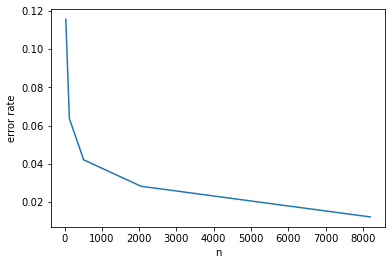

In [384]:
plt.plot(size, errs)
plt.xlabel("n")
plt.ylabel("error rate")

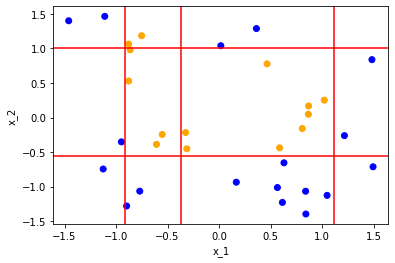

In [385]:
#Q2.7.3
vis_tree(D_32, tree_32)

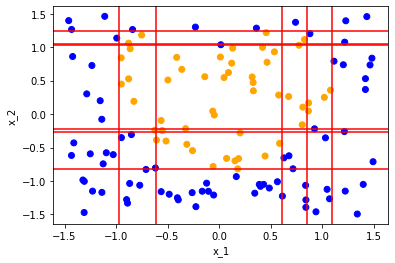

In [386]:
vis_tree(D_128, tree_128)

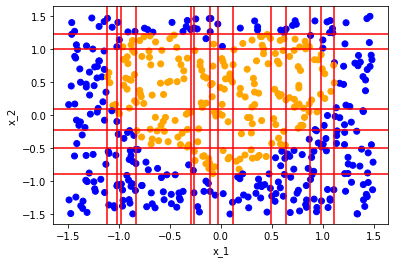

In [387]:
vis_tree(D_512, tree_512)

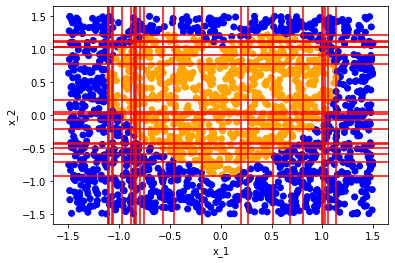

In [388]:
vis_tree(D_2048, tree_2048)

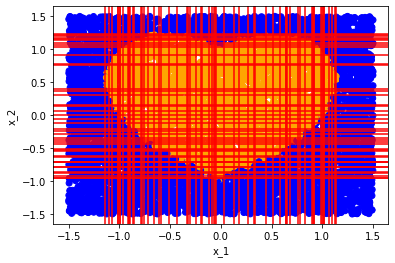

In [389]:
vis_tree(D_8192, tree_8192)

In [380]:
#Q3
size=[32, 128, 512, 2048, 8192]
errs = list()
num_nodes = list()
X_32 = D_train.iloc[:32, :-1]
y_32 = D_train.iloc[:32, [-1]]
clf = DecisionTreeClassifier()
clf = clf.fit(X_32,y_32)
n_32 = clf.tree_.node_count
num_nodes.append(n_32)
y_pred = clf.predict(X)
err_32 = 1-metrics.accuracy_score(y, y_pred)
errs.append(err_32)

X_128 = D_train.iloc[:128, :-1]
y_128 = D_train.iloc[:128, [-1]]
clf = DecisionTreeClassifier()
clf = clf.fit(X_128,y_128)
n_128 = clf.tree_.node_count
num_nodes.append(n_128)
y_pred = clf.predict(X)
err_128 = 1-metrics.accuracy_score(y, y_pred)
errs.append(err_128)

X_512 = D_train.iloc[:512, :-1]
y_512 = D_train.iloc[:512, [-1]]
clf = DecisionTreeClassifier()
clf = clf.fit(X_512,y_512)
n_512 = clf.tree_.node_count
num_nodes.append(n_512)
y_pred = clf.predict(X)
err_512 = 1-metrics.accuracy_score(y, y_pred)
errs.append(err_512)

X_2048 = D_train.iloc[:2048, :-1]
y_2048 = D_train.iloc[:2048, [-1]]
clf = DecisionTreeClassifier()
clf = clf.fit(X_2048,y_2048)
n_2048 = clf.tree_.node_count
num_nodes.append(n_2048)
y_pred = clf.predict(X)
err_2048 = 1-metrics.accuracy_score(y, y_pred)
errs.append(err_2048)

X_8192 = D_train.iloc[:8192, :-1]
y_8192 = D_train.iloc[:8192, [-1]]
clf = DecisionTreeClassifier()
clf = clf.fit(X_8192,y_8192)
n_8192 = clf.tree_.node_count
num_nodes.append(n_8192)
y_pred = clf.predict(X)
err_8192 = 1-metrics.accuracy_score(y, y_pred)
errs.append(err_8192)

for i in range(5):
    print('n: ', size[i], '    number of nodes: ', num_nodes[i], '    error: ', errs[i])

n:  32     number of nodes:  13     error:  0.10287610619469023
n:  128     number of nodes:  25     error:  0.07743362831858402
n:  512     number of nodes:  61     error:  0.047566371681415975
n:  2048     number of nodes:  119     error:  0.03595132743362828
n:  8192     number of nodes:  251     error:  0.0165929203539823


Text(0, 0.5, 'error rate')

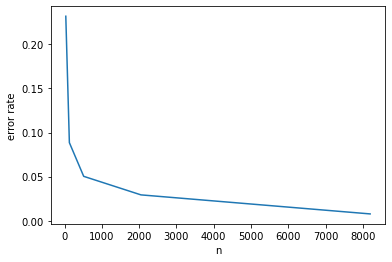

In [354]:
plt.plot(size, errs)
plt.xlabel("n")
plt.ylabel("error rate")

In [403]:
#Q4
import random
import scipy.interpolate
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error

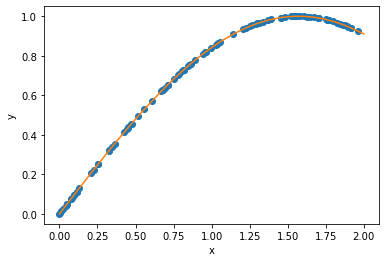

Train error:  0.0
Test error:  5.72053198969124e-08


In [404]:
x_train = np.random.uniform(low=0.0, high=2.0, size = 100)
y_train = [math.sin(xi) for xi in x_train]

f=interp1d(x_train,y_train, fill_value="extrapolate")
xnew = np.linspace(0.0, 2.0, num = 50)
plt.plot(x_train, y_train, 'o', xnew, f(xnew), '-')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

x_test = np.random.uniform(low=0.0, high=2.0, size = 100)
y_test = [math.sin(xi) for xi in x_test]

y_pred = f(x_test)

mse_train=mean_squared_error(f(x_train), y_train)
mse_test=mean_squared_error(f(x_test), y_test)
print('Train error: ', mse_train)
print('Test error: ', mse_test)

The Lagrange interpolation fit the data almost perfectly, leading to almost non-exist training and testing error

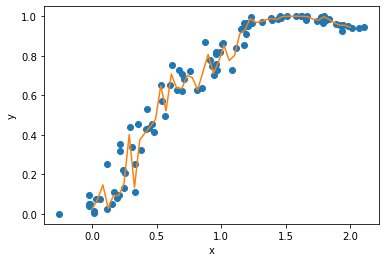

Train error:  7.856063845415512e-36
Test error:  0.0026621079618267336


In [407]:
Epsilon = np.random.normal(0, 0.1, 100)
x_noisy = x_train+Epsilon

f=interp1d(x_noisy,y_train, fill_value="extrapolate")
xnew = np.linspace(0.0, 2.0, num = 50)
plt.plot(x_noisy, y_train, 'o', xnew, f(xnew), '-')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

x_test = np.random.uniform(low=0.0, high=2.0, size = 100)
y_test = [math.sin(xi) for xi in x_test]

y_pred = f(x_test)

mse_train=mean_squared_error(f(x_noisy), y_train)
mse_test=mean_squared_error(f(x_test), y_test)
print('Train error: ', mse_train)
print('Test error: ', mse_test)

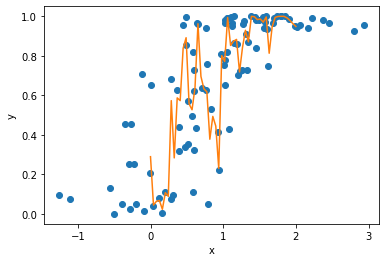

Train error:  2.5126545285532446e-34
Test error:  0.02937086614838891


In [408]:
Epsilon = np.random.normal(0, 0.5, 100)
x_noisy = x_train+Epsilon

f=interp1d(x_noisy,y_train, fill_value="extrapolate")
xnew = np.linspace(0.0, 2.0, num = 50)
plt.plot(x_noisy, y_train, 'o', xnew, f(xnew), '-')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

x_test = np.random.uniform(low=0.0, high=2.0, size = 100)
y_test = [math.sin(xi) for xi in x_test]

y_pred = f(x_test)

mse_train=mean_squared_error(f(x_noisy), y_train)
mse_test=mean_squared_error(f(x_test), y_test)
print('Train error: ', mse_train)
print('Test error: ', mse_test)

To achieve low training accuracy, the program start to overfit the training set, which leads to poor generalization. More noisy the data, the poorer generalization it gets. 